# Scikit-learn
## Overview
Scikit learn is a free open source machine learning library for the Python programming language. It offers both supervised and unsupervised learning algorithms while being focused on modelling data.

# Mean-Shift Clustering Algorithm



# Overview
Meanshift is a popular unsupervised clustering algorithm. It may also be reffered to as the Mode-seeking algorithm as it assigns data points to clusters iteratively by shifting points towards the mode. The mode is the region containing the highest density of data points. Some examples of where the Mean-Shift algorithm is applied are the fields of computer vision, image processing and search engines.

## Advantages
- Meanshift is Model-Free as it does not need to assume any prior shape on data clusters.
- Only needs the window size (bandwidth) as a single parameter h
- Does not need a predetermined number of clusters as it uses the desnisty of points to generate the number of clusters.

## Disadvantages
- Output depends on window size
- It is cumputationally expensive as its process is calculation intensive.
- Excecution time can be rather slow for problems with a large nuber of data points

## How it works
1. Start with data points assigned to their own clusters
2. Computes all the centroids
3. Updates the location of the newly created centroids.
4. This proccess will be repeated moving the centroids to the higher density region
5. Finnaly, the process will be stopped once the centroids can no longer be moved further

## Classification: Sudents Performance Dataset

In [50]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neaighbours
import sklearn.neighbors as nei

# Helper functions
import sklearn.model_selection as mod

# Fancier, statistical plots
import seaborn as sns

In [51]:
# Standard plot size
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [52]:
# Load the iris data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/EmergingTechProject/main/Datasets/StudentsPerformance.csv")

In [55]:
# Have a look at the data.
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [56]:
# Summary statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Visualise the data

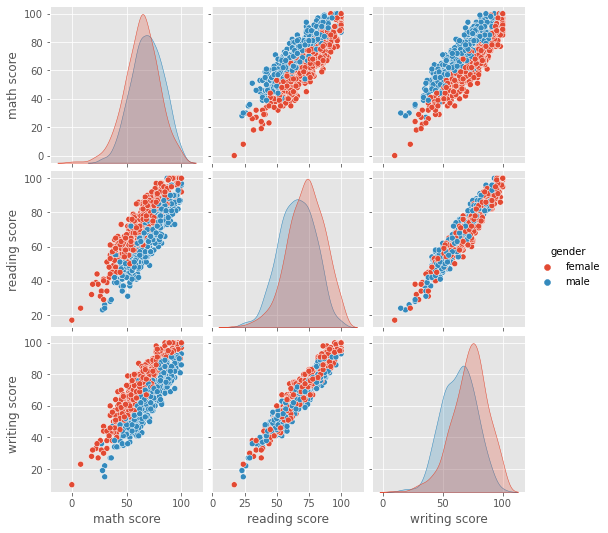

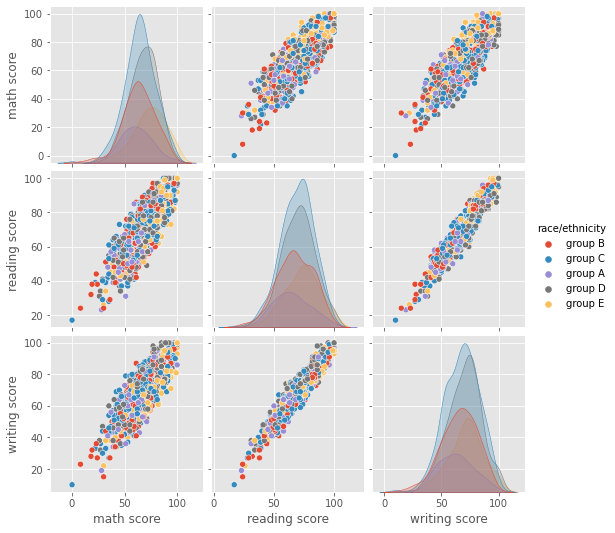

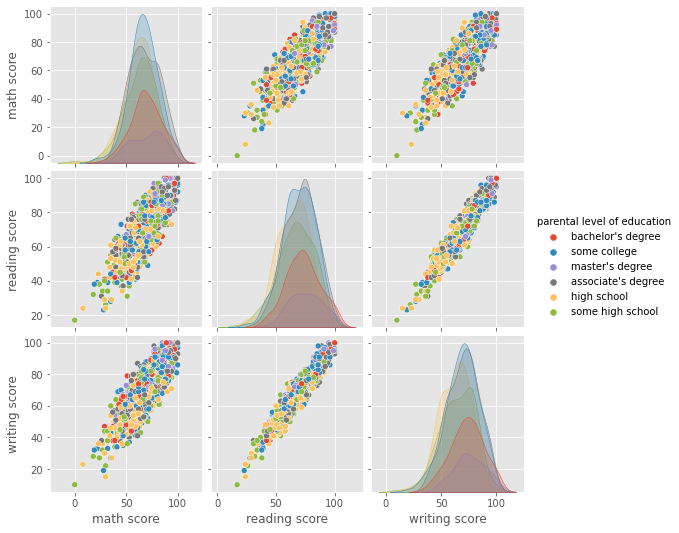

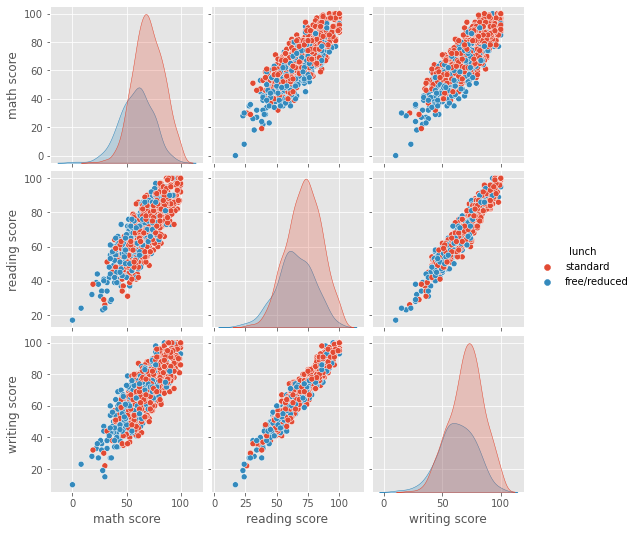

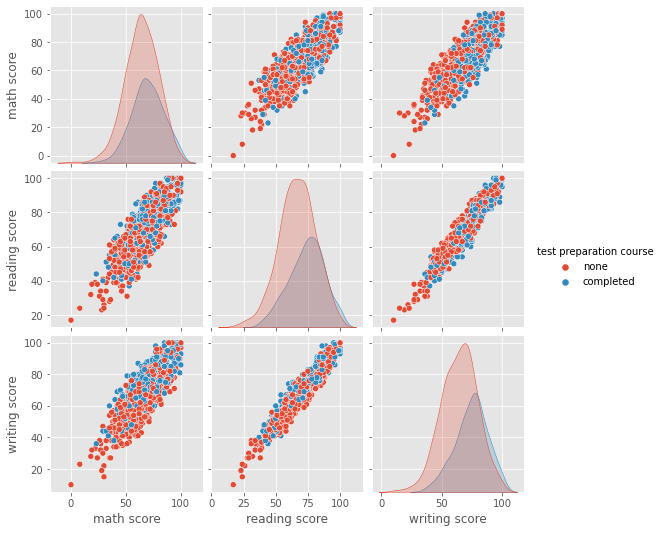

In [66]:
# Scatter plots and kdes
sns.pairplot(df, hue='gender');
sns.pairplot(df, hue='race/ethnicity');
sns.pairplot(df, hue='parental level of education');
sns.pairplot(df, hue='lunch');
sns.pairplot(df, hue='test preparation course');


### Two Dimensions

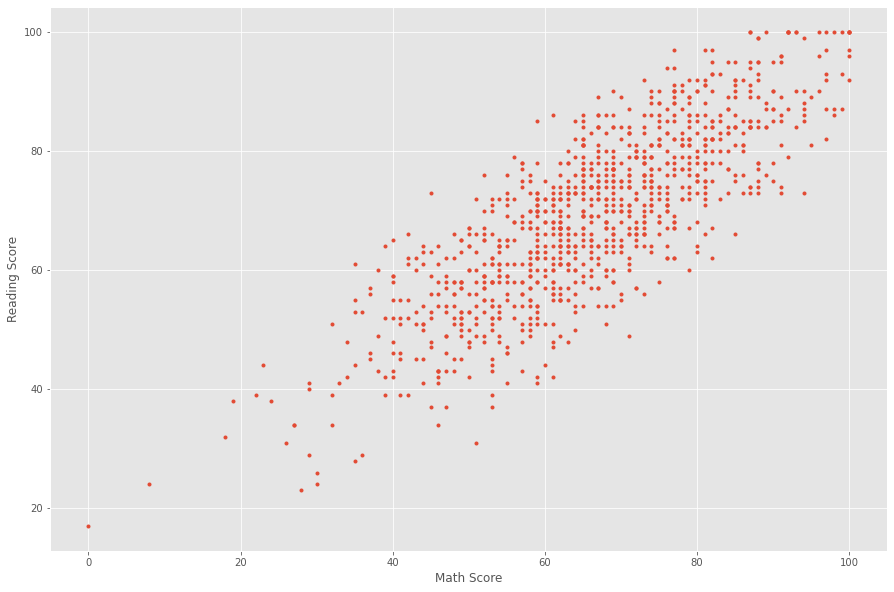

In [68]:
# New figure
fig, ax = plt.subplots()

# Scatter plot
ax.plot(df['math score'], df['reading score'], '.')

# Set axis labels
ax.set_xlabel('Math Score');
ax.set_ylabel('Reading Score');

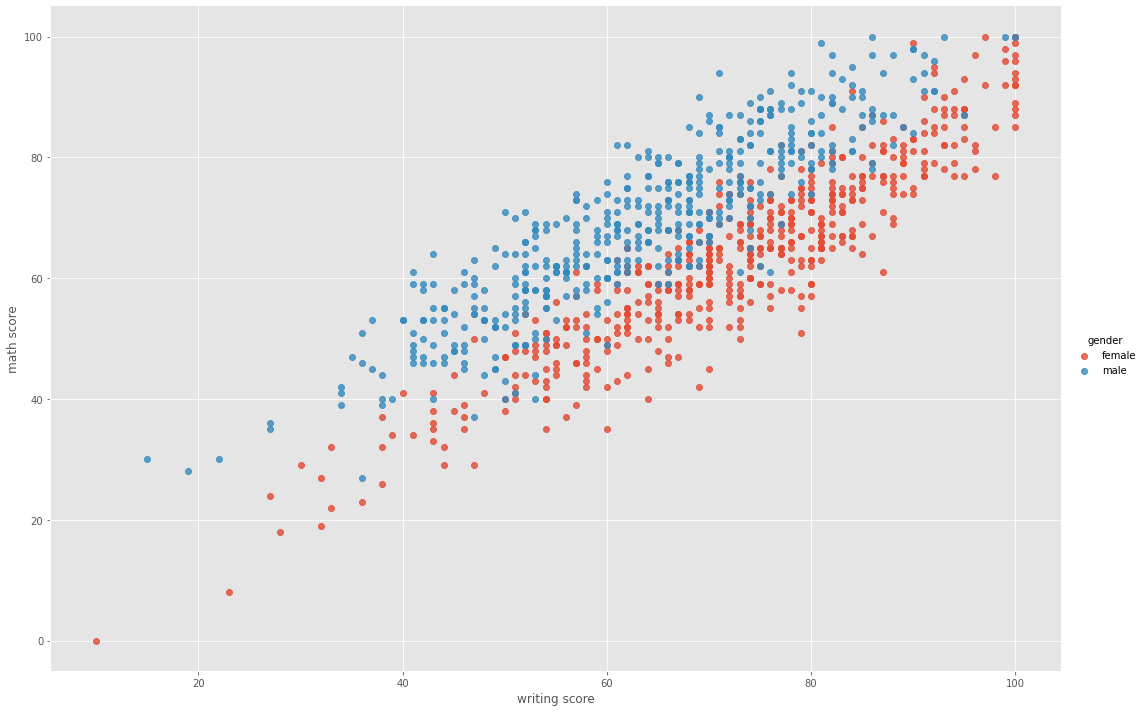

In [71]:
# Seaborn is great for creating complex plots with one command
sns.lmplot(x="writing score", y="math score", hue='gender', data=df, fit_reg=False, height=10, aspect=1.5);

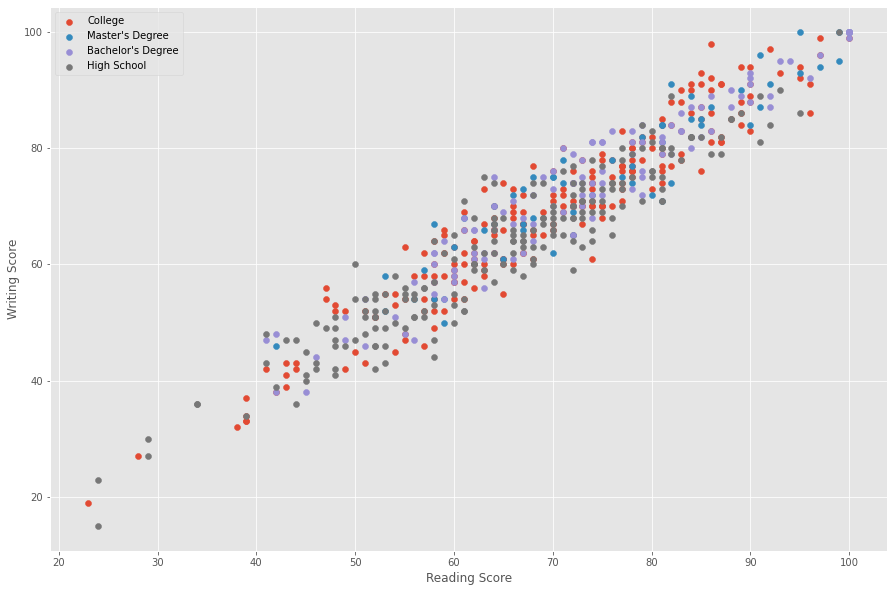

In [81]:
# Segregate the data
college = df[df['parental level of education'] == 'some college']
mastersD = df[df['parental level of education'] == 'master\'s degree']
bachelorsD = df[df['parental level of education'] == 'bachelor\'s degree']
highSchool = df[df['parental level of education'] == 'high school']


# New plot
fig, ax = plt.subplots()

# Scatter plots
ax.scatter(college['reading score'], college['writing score'], label='College')
ax.scatter(mastersD['reading score'], mastersD['writing score'], label='Master\'s Degree')
ax.scatter(bachelorsD['reading score'], bachelorsD['writing score'], label='Bachelor\'s Degree')
ax.scatter(highSchool['reading score'], highSchool['writing score'], label='High School')


# Show the legend
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.legend();

In [82]:
# How the segregation works
df['parental level of education'] == 'master\'s degree'

0      False
1      False
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Name: parental level of education, Length: 1000, dtype: bool

In [84]:
df[df['parental level of education'] == 'master\'s degree'].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
25,male,group A,master's degree,free/reduced,none,73,74,72
29,female,group D,master's degree,standard,none,62,70,75


### Using groupby()

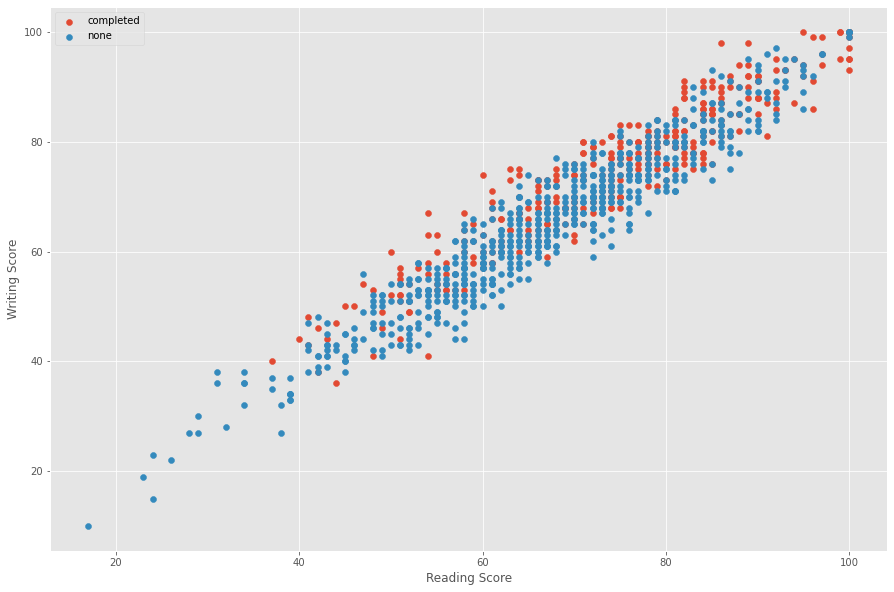

In [85]:
# New plot
fig, ax = plt.subplots()

# Using pandas groupby()
for preperation, data in df.groupby('test preparation course'):
    ax.scatter(data['reading score'], data['writing score'], label=preperation)

# Show the legend
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.legend();

In [86]:
# Group by typically takes a categorical variable.
x = df.groupby('parental level of education')
x

In [87]:
# Pivot tables.
x.mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [88]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'associate's degree'
j looks like:
    gender race/ethnicity parental level of education         lunch  \
3     male        group A          associate's degree  free/reduced   
5   female        group B          associate's degree      standard   
10    male        group C          associate's degree      standard   

   test preparation course  math score  reading score  writing score  
3                     none          47             57             44  
5                     none          71             83             78  
10                    none          58             54             52  


i is: 'bachelor's degree'
j looks like:
    gender race/ethnicity parental level of education         lunch  \
0   female        group B           bachelor's degree      standard   
24    male        group D           bachelor's degree  free/reduced   
27  female        group C           bachelor's degree      standard   

   test preparation course  math score  reading score  writing

In [1]:
import numpy as np
import pandas as pd
import cv2
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

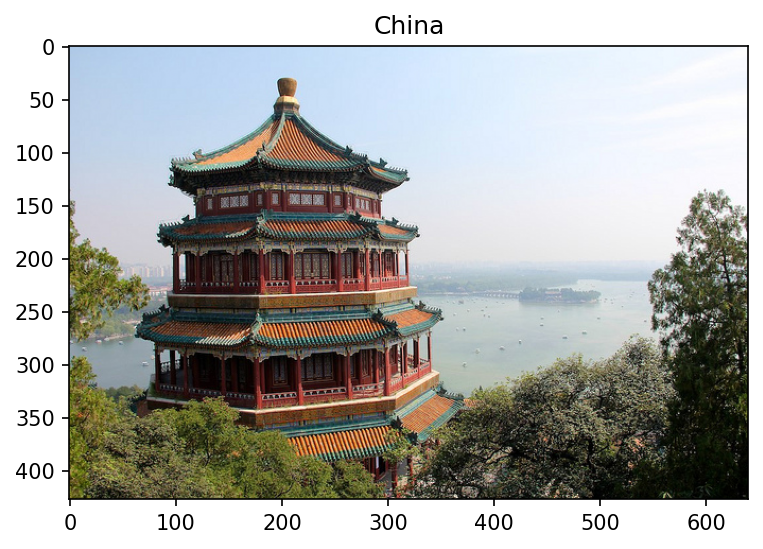

In [26]:
image = load_sample_image('china.jpg')
image = np.array(image, dtype=np.float64) / 255
plt.figure(dpi=150)
plt.title('China')
plt.imshow(image)

In [27]:
index = pd.MultiIndex.from_product(
    (*map(range, image.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))

In [28]:
df_1 = pd.Series(image.flatten(), index=index)
df_1 = df_1.unstack()
df_1 = df_1.reset_index().reindex(columns=['col','row',   'r','g','b'])
df_1.head(10)

,col,row,r,g,b
0,0,0,0.682353,0.788235,0.905882
1,1,0,0.682353,0.788235,0.905882
2,2,0,0.682353,0.788235,0.905882
3,3,0,0.682353,0.788235,0.905882
4,4,0,0.682353,0.788235,0.905882
5,5,0,0.682353,0.788235,0.905882
6,6,0,0.682353,0.788235,0.905882
7,7,0,0.682353,0.788235,0.905882
8,8,0,0.678431,0.792157,0.909804
9,9,0,0.674510,0.788235,0.905882


In [29]:
df_2 = df_1[['r', 'g', 'b']]
df_2.head(10)

,r,g,b
0,0.682353,0.788235,0.905882
1,0.682353,0.788235,0.905882
2,0.682353,0.788235,0.905882
3,0.682353,0.788235,0.905882
4,0.682353,0.788235,0.905882
5,0.682353,0.788235,0.905882
6,0.682353,0.788235,0.905882
7,0.682353,0.788235,0.905882
8,0.678431,0.792157,0.909804
9,0.674510,0.788235,0.905882


In [30]:
nd_1 = df_1.values.astype(np.float32)
nd_1[:, 0] = nd_1[:, 0] / (nd_1[:, 0].max() + 1)
nd_1[:, 1] = nd_1[:, 1] / (nd_1[:, 1].max() + 1)
nd_1[:, 2:] = nd_1[:, 2:] / 255
nd_2 = df_2.astype(np.float64) / 255

In [31]:
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_1)
nd_2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_2)


In [32]:
bandwidth_1 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=500)
bandwidth_2 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=500)

In [33]:
ms_1 = MeanShift(bandwidth = bandwidth_1 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)

In [34]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

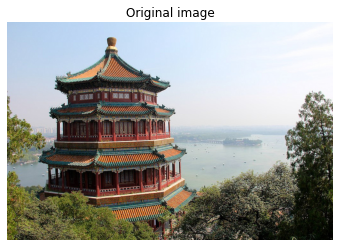

In [35]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image', loc='center')
plt.imshow(image)

In [40]:
w, h, d = original_shape = tuple(image.shape)
print(w + h)

1067


TypeError: Invalid shape (427, 640, 5) for image data

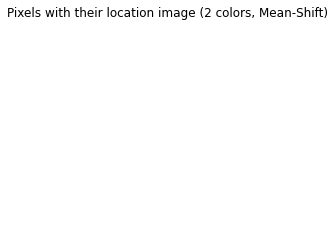

In [42]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Pixels with their location image ({} colors, Mean-Shift)'.format(len(ms_1.cluster_centers_)), loc='center')
plt.imshow(recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h))

In [28]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

NameError: name 'X' is not defined

In [ ]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()